In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV ,cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression,make_classification 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score , accuracy_score,classification_report,confusion_matrix,roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [266]:
df = pd.read_csv('Medical Insurance Data.csv')

In [81]:
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


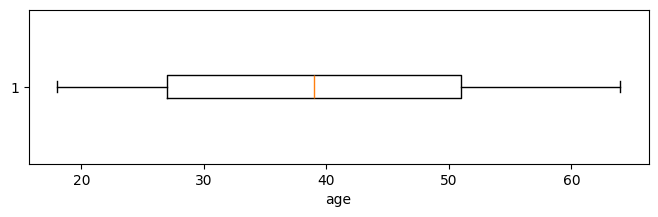

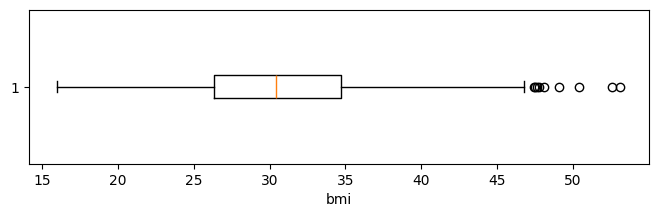

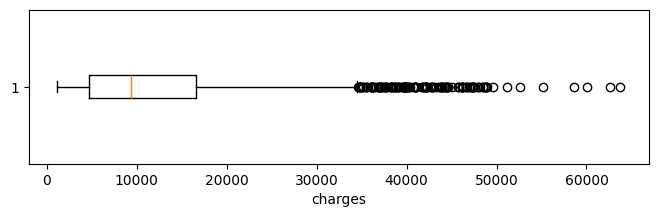

In [82]:
for i in ["age", "bmi", "charges"]:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[i], vert=False)
    plt.xlabel(i)
    plt.show()

In [83]:
for i in ["gender", "children", "smoker", "region"]:
    print(df[i].value_counts())

gender
male      676
female    662
Name: count, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [84]:
df[["children", "charges"]].corr()

,children,charges
children,1.000000,0.067998
charges,0.067998,1.000000


In [85]:
df.groupby('region')["charges"].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [86]:
dummies = pd.get_dummies(df[["smoker", "gender", "region"]], dtype=int, drop_first=True)

In [87]:
df.drop(["smoker", "gender", "region", "children"], axis=1, inplace=True)

In [88]:
df.head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


In [89]:
df.corr()

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


In [90]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [91]:
X

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


In [92]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [93]:
model = LinearRegression()

In [94]:
model.fit(X, y)

LinearRegression()

In [95]:
model.predict([[-0.797954, 0.383307]])

C:\Users\UNIQUE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-6490.22639413])

In [96]:
y_pred = model.predict(X)

In [97]:
y_pred

array([ 7461.6062016 ,  9174.18050678, 11337.10516586, ...,
       10199.71298649,  7246.24106669, 18012.2680297 ])

In [98]:
np.sqrt(mean_squared_error(y, y_pred)) 

np.float64(11374.110466839007)

In [99]:
y.mean()

np.float64(13270.422265141257)

In [100]:
df

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


In [101]:
def outliers(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    return dataframe[(dataframe[column]<lower) | (dataframe[column]>upper)]

In [102]:
outliers(df, "bmi")

,age,bmi,charges
116,58,49.06,11381.32540
286,46,48.07,9432.92530
401,47,47.52,8083.91980
543,54,47.41,63770.42801
847,23,50.38,2438.05520
860,37,47.60,46113.51100
1047,22,52.58,44501.39820
1088,52,47.74,9748.91060
1317,18,53.13,1163.46270


In [103]:
outliers(df, "bmi").index.tolist()

[116, 286, 401, 543, 847, 860, 1047, 1088, 1317]

<Axes: >

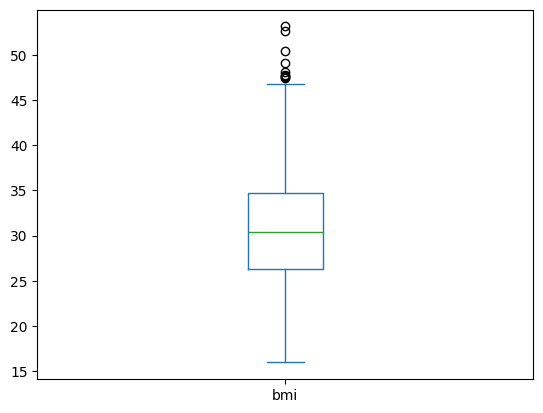

In [104]:
df["bmi"].plot.box()

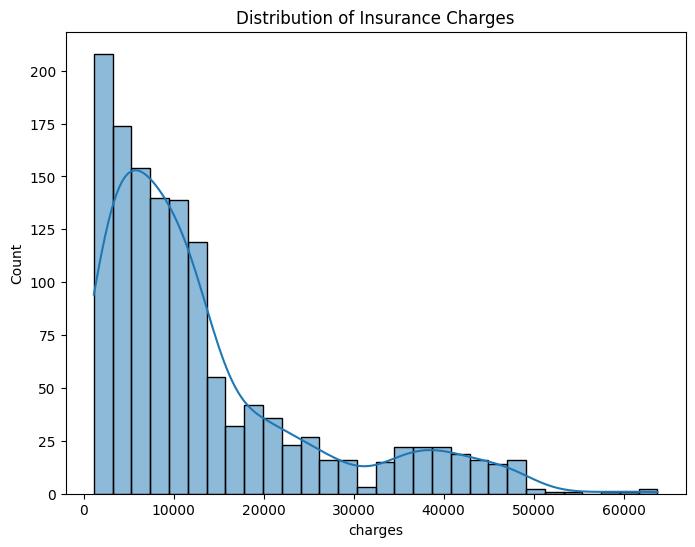

In [105]:
plt.figure(figsize=(8,6))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Insurance Charges')
plt.show()

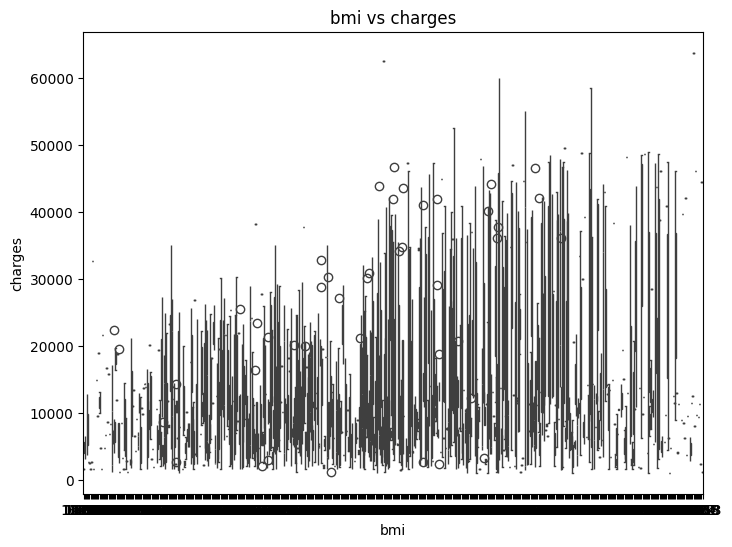

In [106]:
plt.figure(figsize=(8,6))
sns.boxplot(x='bmi', y='charges', data=df)
plt.title('bmi vs charges')
plt.show()

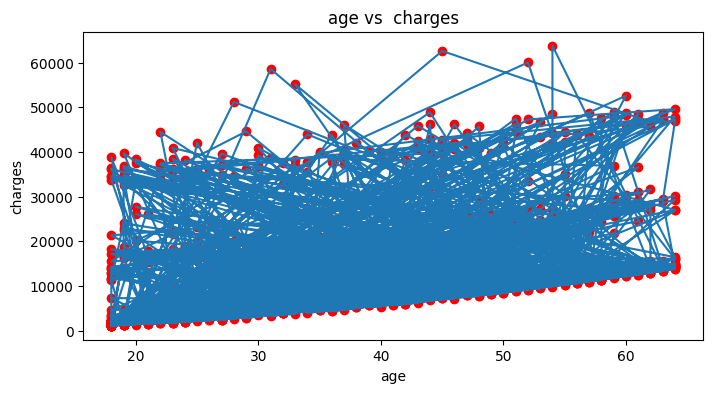

In [107]:
plt.figure(figsize=(8,4))
plt.plot(df["age"],df["charges"])
plt.scatter(df["age"], df["charges"], marker="o",color="red")
plt.xlabel("age")
plt.ylabel("charges")
plt.title("age vs  charges")
plt.show()

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
X

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


In [110]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [111]:
y_pred

array([ 7461.6062016 ,  9174.18050678, 11337.10516586, ...,
       10199.71298649,  7246.24106669, 18012.2680297 ])

In [112]:
epochs= 100
lr =0.1
m =2.43
c =9.34

epochs, lr, m, c

(100, 0.1, 2.43, 9.34)

In [113]:
m,c

(2.43, 9.34)

In [114]:
m*550+c

1345.84

In [186]:
np.round(pred)

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0])

Decision Tree Regression

In [115]:
X, y = make_regression(n_features=10, n_samples=1000, n_targets=1, noise=4)

In [116]:
X

array([[ 0.22938661, -0.03899654,  0.77865565, ...,  0.02324724,
         0.05934135, -0.74807404],
       [-0.94345444,  0.34110817,  0.81946944, ...,  0.62889468,
        -1.05829455,  0.41965687],
       [-1.28476939,  0.32845923, -0.51372772, ...,  1.86350026,
         0.31505486,  2.00195133],
       ...,
       [-0.53944347, -0.83784987, -0.71951228, ..., -1.22537598,
        -0.47640001,  0.45270737],
       [-0.76643877, -1.11427422,  0.56871268, ..., -0.13303638,
        -0.50030893,  0.97622673],
       [ 0.574483  ,  0.54606633,  0.39318681, ...,  0.59410438,
        -2.12996455,  0.42322078]])

In [117]:
y

array([-1.38957369e+02,  3.47870271e+02, -4.61069732e+02,  2.33523396e+02,
        8.68137679e+00,  8.88398272e+01,  1.52151010e+02, -4.87825371e+01,
       -1.18659656e+02,  2.00295723e+01, -2.13637272e+02, -6.64657681e+02,
        2.99201767e+02,  2.50198939e+02, -1.34434689e+02, -2.87107667e+02,
       -1.97108480e+02, -5.17434628e+01, -1.18436269e+02, -1.74414180e+02,
       -1.13116218e+02, -2.71572710e+02,  2.24928770e+01, -2.65869340e+02,
        6.27355711e+01,  3.80849928e+02,  3.40444141e+01,  4.86652038e+01,
       -1.55937984e+02, -3.32816245e+02, -2.26603981e+02, -1.74831884e+01,
        1.22327010e+02,  3.30607002e+02,  2.82090880e+01,  2.97775604e+02,
        2.02633700e+02,  2.19449462e+02, -3.07090348e+01,  2.82676736e+02,
        8.12300124e+01, -4.34625764e+01, -2.87947802e+02,  4.30436832e+02,
       -2.26943202e+01,  3.32770353e+02,  1.97714006e+01,  1.37540876e+02,
       -5.05174561e+02, -9.07085938e+01,  9.28627778e+01, -9.48203514e+01,
        7.32716042e+01,  

In [118]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=234, train_size=0.75)

In [119]:
X_tr.shape

(750, 10)

In [120]:
y_tr.shape

(750,)

In [121]:
model1 = DecisionTreeRegressor()

In [122]:
model1.fit(X_tr, y_tr)

DecisionTreeRegressor()

In [123]:
y_pr = model1.predict(X_tr)


In [124]:
rmse = np.sqrt(mean_squared_error(y_tr, y_pr))
rmse

np.float64(0.0)

In [125]:
param_list = {
    "max_depth":[1, 2, 3, 4, 5, 6],
    "min_samples_split": [2, 3, 4, 1] ,
    "max_features":[3, 4, 5, 6, 7]
}

In [126]:
gscv = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_list, n_jobs=-1, verbose=True)

In [127]:
gscv.fit(X_tr, y_tr)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\UNIQUE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\UNIQUE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\UNIQUE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\UNIQUE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': [3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 1]},
             verbose=True)

In [128]:

gscv.best_params_

{'max_depth': 6, 'max_features': 7, 'min_samples_split': 3}

In [129]:
m = DecisionTreeRegressor(max_depth=6, max_features=7, min_samples_split=2)
m.fit(X_tr, y_tr)
pr = m.predict(X_te)
r2_score(y_te, pr)

0.4141214652471602

EDA

KNN

In [136]:
X, y = make_blobs(n_samples=50, n_features=2, centers=[[1, 2], [3, 5]])

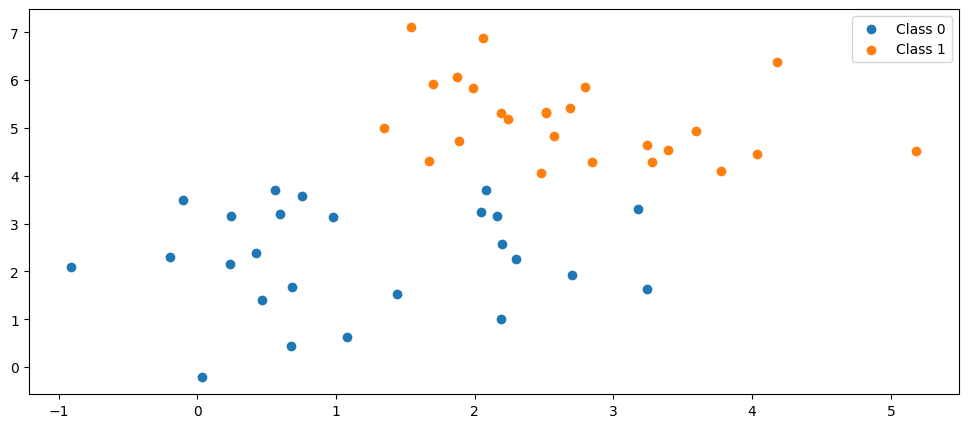

In [137]:
plt.figure(figsize=(12, 5))
plt.scatter(X[y==0, 0], X[y==0, 1], label="Class 0")
plt.scatter(X[y==1, 0], X[y==1, 1], label="Class 1")
plt.legend()
plt.show()

In [138]:
df = pd.DataFrame(X, columns=["bmi", "charges"])
df["Target"] = y

In [139]:
df.head()

,bmi,charges,Target
0,2.198493,2.570840,0
1,2.188048,5.311741,1
2,2.796029,5.860005,1
3,-0.104899,3.495205,0
4,3.245244,4.642371,1


In [140]:
new_pt = np.random.rand(2)*2

In [141]:
new_pt

array([1.71293527, 0.7026716 ])

In [142]:
dist = np.sqrt(np.square(df["bmi"]-new_pt[0])+np.square(df["charges"]-new_pt[1]))

In [143]:
dist

0     1.930238
1     4.633492
2     5.269837
3     3.332082
4     4.227198
5     1.432219
6     1.575102
7     3.758832
8     1.070537
9     4.408600
10    1.420876
11    1.792643
12    1.672278
13    3.449123
14    5.374695
15    2.503176
16    4.038767
17    3.607697
18    2.985430
19    4.214346
20    5.163228
21    1.905677
22    5.132065
23    3.982537
24    3.915925
25    2.078079
26    2.540903
27    4.179481
28    2.495120
29    6.415436
30    5.220307
31    4.644245
32    4.519436
33    6.190869
34    4.303205
35    2.557436
36    4.678273
37    2.728562
38    2.111061
39    0.870700
40    2.856049
41    0.566938
42    4.695649
43    2.966372
44    4.810055
45    6.184689
46    3.027190
47    0.637079
48    3.034358
49    3.208744
dtype: float64

In [144]:
df["distance"] = dist

In [145]:
df.sort_values("distance").head()

,bmi,charges,Target,distance
41,2.188429,1.011418,0,0.566938
47,1.079055,0.638918,0,0.637079
39,1.441740,1.530060,0,0.870700
8,0.675919,0.436877,0,1.070537
10,0.682627,1.681117,0,1.420876


In [146]:
def KNN_classifier(dataframe, new_point, k):
    dist = np.sqrt(np.square(dataframe["bmi"]-new_point[0])+np.square(dataframe["charges"]-new_point[1]))
    df["distance"] = dist
    return df.sort_values("distance").head(k)

In [147]:
KNN_classifier(df, np.array([1.34123, 2.12341]), 5)

,bmi,charges,Target,distance
39,1.441740,1.530060,0,0.601802
10,0.682627,1.681117,0,0.793335
38,0.425434,2.375668,0,0.949903
12,2.296054,2.269990,0,0.966009
0,2.198493,2.570840,0,0.967002


EDA

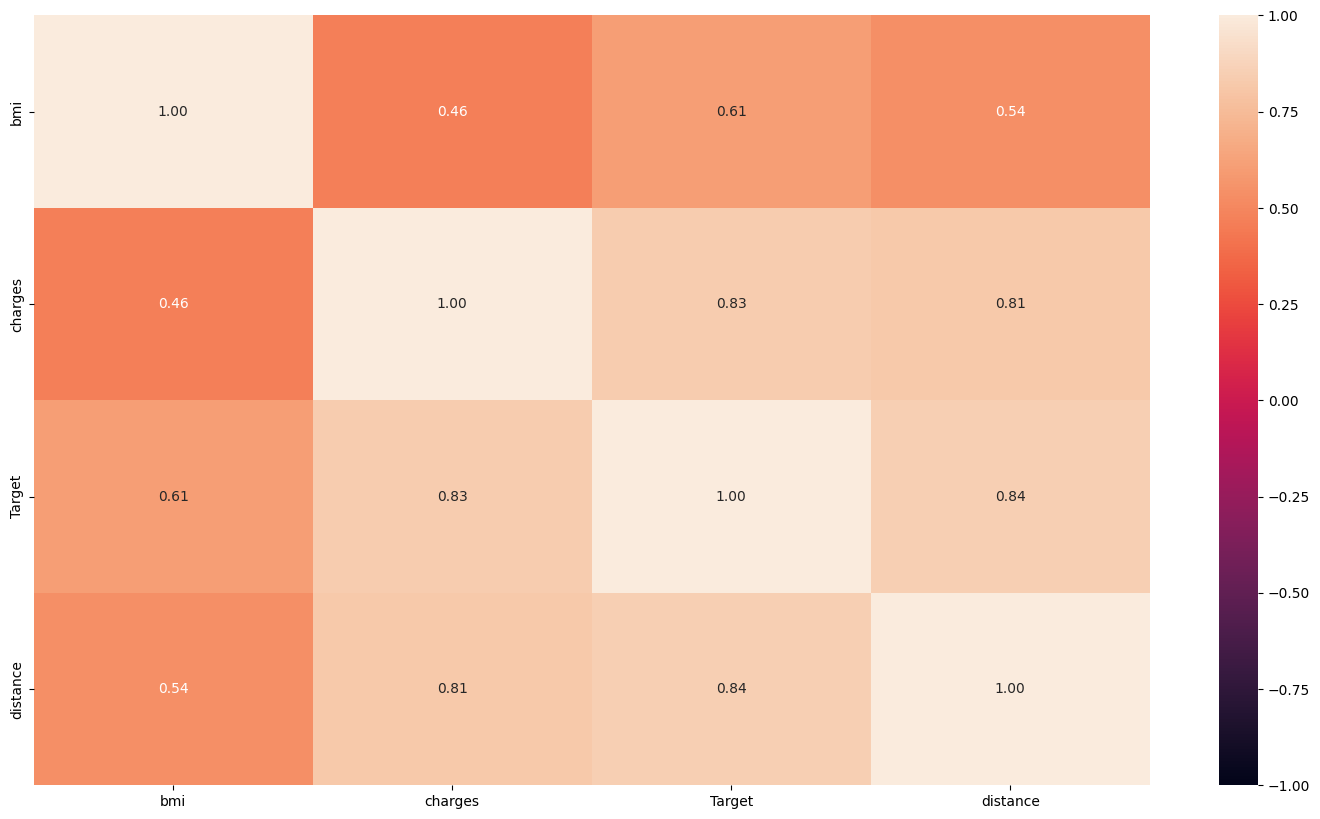

In [148]:
plt.figure(figsize=(18,10))
(sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f"))
plt.show()

In [149]:
df.corr().iloc[0].sort_values()["bmi":"charges"]

Series([], Name: bmi, dtype: float64)

In [150]:
corr = df.corr()

In [151]:
corr.query("bmi<-0.09 | bmi > 0.09")["bmi"]

bmi         1.000000
charges     0.464286
Target      0.605431
distance    0.538606
Name: bmi, dtype: float64

In [152]:
pd.crosstab(df["bmi"],df["charges"]).value_counts()

-0.20218168271250114  0.43687695295468765  0.6389183979412463  1.0114183616343206  1.408290028021113  1.530060326321085  1.6433179221518417  1.681116866153962  1.9318757959938668  2.0848653224216  2.165041718814052  2.2699902547032957  2.3117728360331675  2.37566848280542  2.5708396586987465  3.1352156347407147  3.1532953335512355  3.1653626682971687  3.1909649280498  3.2383349917187947  3.3038427253099627  3.495205423036061  3.5806808895619837  3.696736497227513  3.707186817431598  4.06538950164518  4.109499424750852  4.287457209278155  4.292430143481879  4.310079807984448  4.449985751008743  4.525178652290377  4.530083656976649  4.6423705636466535  4.73769774985276  4.829199665414096  4.94675043302038  4.990481140915392  5.191606732058551  5.311740938858896  5.311817792003833  5.3290801492837705  5.412894987780994  5.8272838475932875  5.860005424827181  5.922952153540763  6.074956431030609  6.3796584989070855  6.877581557601925  7.115729402817413
0                     0              

In [153]:
pd.crosstab(df["bmi"],df["Target"]).value_counts()

0  1
0  1    25
1  0    25
Name: count, dtype: int64

In [154]:
smoker = np.random.normal(41, 9, 20)
region = np.random.normal(75, 10, 20)

In [155]:
df = pd.DataFrame({"smoker":smoker, "region":region})

In [156]:
df

,smoker,region
0,42.863691,67.399574
1,42.489925,63.261302
2,38.629437,75.987695
3,45.711266,77.736221
4,32.474847,85.835402
5,44.065920,87.364958
6,31.380003,80.640103
7,35.085474,70.913647
8,59.535017,69.967448
9,51.257817,66.303168


LOGISTIC REGRESSION

In [167]:
model2= LogisticRegression()

In [171]:
model2.fit(X,y)

LogisticRegression()

In [172]:
X

array([[ 2.19849251,  2.57083966],
       [ 2.1880478 ,  5.31174094],
       [ 2.79602933,  5.86000542],
       [-0.10489932,  3.49520542],
       [ 3.24524431,  4.64237056],
       [ 0.46659944,  1.40829003],
       [ 2.69782298,  1.9318758 ],
       [ 2.84347963,  4.28745721],
       [ 0.67591875,  0.43687695],
       [ 4.03530267,  4.44998575],
       [ 0.68262736,  1.68111687],
       [ 3.2389611 ,  1.64331792],
       [ 2.29605357,  2.26999025],
       [ 2.4801213 ,  4.0653895 ],
       [ 1.87386742,  6.07495643],
       [ 2.1613112 ,  3.16536267],
       [ 1.88672133,  4.73769775],
       [ 1.66727112,  4.31007981],
       [ 3.17809709,  3.30384273],
       [ 2.56878467,  4.82919967],
       [ 5.18386613,  4.52517865],
       [ 0.03578152, -0.20218168],
       [ 1.98941184,  5.82728385],
       [ 3.7754878 ,  4.10949942],
       [ 3.27757681,  4.29243014],
       [ 0.23649186,  2.16504172],
       [ 0.97882597,  3.13521563],
       [ 3.3919165 ,  4.53008366],
       [-0.19400392,

In [173]:
y

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0])

In [175]:
pred = model2.predict(X)

In [176]:
pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0])

In [177]:
accuracy_score(y, pred)

1.0

In [179]:
pred_prob = model2.predict_proba(X)

In [180]:
np.round(pred_prob[0],decimals=6)

array([0.942207, 0.057793])

In [182]:
pred_prob[40]

array([0.96443142, 0.03556858])

Performance Matrix

In [201]:
X, y = make_classification(n_samples=500, n_classes=2, n_features=10, n_informative=7)

In [202]:
X[:5, :]

array([[-0.42048501, -2.11821097, -0.31058518,  1.79856187,  1.65414663,
         4.6828534 , -3.09956221,  1.22927617,  0.15501362,  0.73048127],
       [ 2.38453861,  0.26691186,  1.58297262, -2.79001661,  1.3114308 ,
        -1.39286248,  1.60879507, -1.08657336,  0.62462451, -1.53205108],
       [ 2.71815123,  3.65081509,  3.63269241, -2.0042202 ,  0.33330209,
         2.72880068,  4.64680306,  2.62167952, -0.83270253, -0.94149666],
       [-2.18391592,  2.40213401,  0.38643036, -0.74548122, -2.97972187,
        -3.96495584,  4.18658422, -0.37175596, -2.09980689, -0.65946183],
       [-1.61442852,  2.7844361 ,  0.92593562, -1.55397872, -1.84290334,
        -1.69508365,  5.50084499,  1.17782455,  0.55960201, -0.938462  ]])

In [203]:
y[:5]

array([0, 1, 0, 0, 0])

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=74)

In [205]:
X_train[0]

array([ 0.428894  , -3.4254869 ,  1.75720867, -1.62737534, -3.18780785,
       -1.61741734, -1.61301427,  0.31632813,  0.57754998, -1.07576233])

In [206]:
X_train.shape

(375, 10)

In [207]:
X_test.shape

(125, 10)

In [208]:
y_train.shape

(375,)

In [209]:
y_test.shape

(125,)

In [214]:
model = LogisticRegression()

In [215]:
model.fit(X_train, y_train)

LogisticRegression()

In [216]:
y_pred = model.predict(X_test)

In [217]:
accuracy_score(y_test, y_pred)

0.672

In [218]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71        72
           1       0.61      0.64      0.62        53

    accuracy                           0.67       125
   macro avg       0.67      0.67      0.67       125
weighted avg       0.67      0.67      0.67       125



In [219]:
confusion_matrix(y_test, y_pred)

array([[50, 22],
       [19, 34]])

In [220]:
50/45

1.1111111111111112

In [221]:
7.23/45.0

0.16066666666666668

In [222]:
47+89

136

ROC - AUC

In [229]:
X,y = make_classification(n_classes=2, n_samples=1000,n_features=10, n_informative=7)

In [230]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y , train_size=0.7, random_state=245)

In [232]:
model = LogisticRegression()

In [233]:
model.fit(X_tr, y_tr)

LogisticRegression()

In [234]:
y_pr = model.predict(X_te)

In [235]:
accuracy_score(y_te, y_pr)

0.85

In [236]:
y_prob = model.predict_proba(X_te)[:, 1]

In [237]:
y_prob

array([0.65304958, 0.9148945 , 0.01575777, 0.95234129, 0.0481996 ,
       0.88329535, 0.75276314, 0.42897923, 0.98860616, 0.08694266,
       0.02207264, 0.09597546, 0.20257131, 0.98529122, 0.99327499,
       0.03839773, 0.81217495, 0.00348822, 0.78882013, 0.17484294,
       0.01524847, 0.03231884, 0.20233293, 0.21914662, 0.01192667,
       0.30635348, 0.44571913, 0.68412456, 0.03234042, 0.57759941,
       0.09201953, 0.9709519 , 0.18862055, 0.48172511, 0.91282096,
       0.42459694, 0.27561222, 0.14398734, 0.99672193, 0.78470987,
       0.89062725, 0.8362492 , 0.89195124, 0.89983256, 0.16537138,
       0.21635886, 0.99912689, 0.99173973, 0.5181943 , 0.96783599,
       0.08073732, 0.22483179, 0.11795185, 0.13157917, 0.0917302 ,
       0.17172508, 0.84311708, 0.1147412 , 0.22224369, 0.92511027,
       0.98439956, 0.2089623 , 0.96278618, 0.95018538, 0.99229597,
       0.88668647, 0.93643318, 0.06349927, 0.53703946, 0.11726796,
       0.89772779, 0.67024021, 0.09056601, 0.60687854, 0.67028

In [239]:
fpr, tpr, threshold = roc_curve(y_te, y_prob)

In [241]:
fpr, tpr, threshold

(array([0.        , 0.        , 0.        , 0.00714286, 0.00714286,
        0.01428571, 0.01428571, 0.02142857, 0.02142857, 0.02857143,
        0.02857143, 0.03571429, 0.03571429, 0.04285714, 0.04285714,
        0.06428571, 0.06428571, 0.07142857, 0.07142857, 0.07857143,
        0.07857143, 0.08571429, 0.08571429, 0.09285714, 0.09285714,
        0.1       , 0.1       , 0.11428571, 0.11428571, 0.12857143,
        0.12857143, 0.13571429, 0.13571429, 0.17857143, 0.17857143,
        0.19285714, 0.19285714, 0.22142857, 0.22142857, 0.25714286,
        0.25714286, 0.26428571, 0.26428571, 0.27857143, 0.27857143,
        0.28571429, 0.28571429, 0.29285714, 0.29285714, 0.30714286,
        0.30714286, 0.33571429, 0.33571429, 0.34285714, 0.34285714,
        0.35      , 0.35      , 0.36428571, 0.36428571, 0.38571429,
        0.38571429, 0.41428571, 0.41428571, 0.46428571, 0.46428571,
        0.5       , 0.5       , 0.59285714, 0.59285714, 0.77142857,
        0.77142857, 0.8       , 0.8       , 1.  

In [242]:
auc_score =roc_auc_score(y_te, y_prob)

In [243]:
auc_score

np.float64(0.9128571428571429)

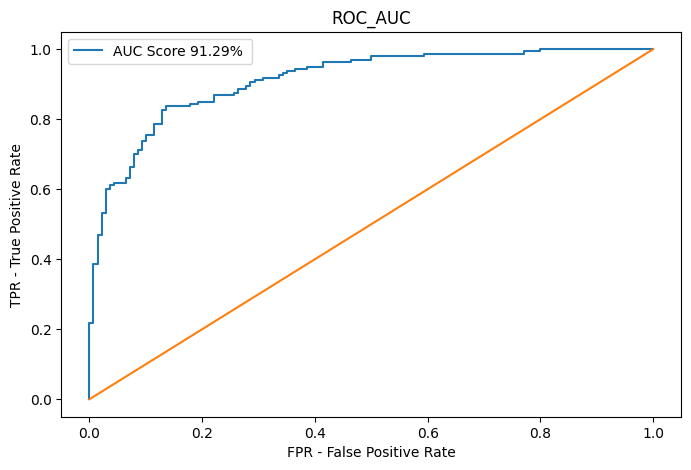

In [244]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC Score {np.round(auc_score,decimals=4)*100}% ")
plt.plot([0, 1], [0, 1])
plt.title("ROC_AUC")
plt.xlabel("FPR - False Positive Rate")
plt.ylabel("TPR - True Positive Rate")
plt.legend()
plt.show()   

CROSS VALIDATION

In [245]:
kf = KFold(n_splits=10)

In [246]:
cvs = cross_val_score(estimator= LogisticRegression(), X=X_tr, y=y_tr, cv=kf,
                     n_jobs=-1, verbose=True, scoring="accuracy")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.8s finished


In [247]:
cvs

array([0.85714286, 0.82857143, 0.84285714, 0.87142857, 0.85714286,
       0.84285714, 0.78571429, 0.8       , 0.91428571, 0.8       ])

In [248]:
cross_validation_score = cvs.mean()

In [249]:
cross_validation_score

np.float64(0.8400000000000001)

ADABOOST

In [256]:
df = pd.read_csv('Medical Insurance Data.csv')

In [258]:
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [259]:
df.shape

(1338, 7)

ADABOOST 

In [270]:
model3 = AdaBoostClassifier(n_estimators=300, estimator=DecisionTreeClassifier(max_depth=4))

In [273]:
model3.fit(X_tr, y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4),
                   n_estimators=300)

In [274]:
model.score(X_tr, y_tr)

0.8485714285714285

In [275]:
y_pr = model.predict(X_te)

In [276]:
accuracy_score(y_te, y_pr)

0.85

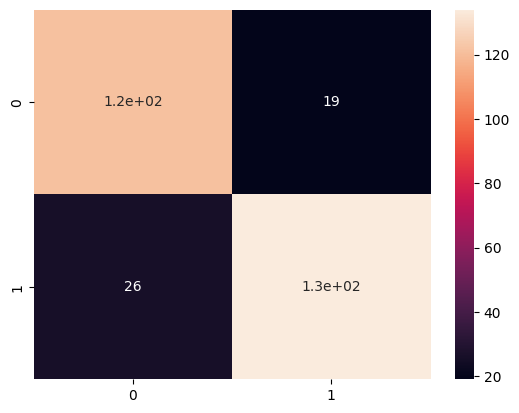

In [278]:
sns.heatmap(confusion_matrix(y_te, y_pr), annot=True)
plt.show()

In [279]:
print(classification_report(y_te, y_pr))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       140
           1       0.88      0.84      0.86       160

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

